In [1]:
# import the packages
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import geopandas as gpd
from collections import Counter
from statistics import mode
import datetime
from sklearn.metrics.pairwise import cosine_similarity
import geopandas
import rtree
import seaborn as sns
import haversine as hs

# 1 Import data

In [2]:
# import the data into pandas dataframes
hvc_am0 = pd.read_csv("../ACRM-GROUP-13/data/HVC_AM0.csv", sep=";")
hvc_ar0 = pd.read_csv("../ACRM-GROUP-13/data/HVC_AR0.csv", sep=";")
hvc_customer_reviews = pd.read_csv("../ACRM-GROUP-13/data/HVC_CUSTOMER_REVIEWS.csv", sep=";")
hvc_depot = pd.read_csv("../ACRM-GROUP-13/data/HVC_DEPOT.csv", sep=";")
hvc_hvdayofweek = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVDAYOFWEEK.csv", sep=";")
hvc_hvposition = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVPOSITION_CORRECT.csv", sep=";")
hvc_hvroutetemplate = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVROUTETEMPLATE.csv", sep=";")
hvc_hvvisitoutcome = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVVISITOUTCOME.csv", sep=";")
hvc_hvvisitresult = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVVISITRESULT.csv", sep=";")
hvc_so0 = pd.read_csv("../ACRM-GROUP-13/data/HVC_SO0.csv", sep=";")
hvc_visitresultdetails = pd.read_csv("../ACRM-GROUP-13/data/HVC_VISITRESULTDETAILS.csv", sep=";")
postcodes_df = pd.read_csv("../ACRM-GROUP-13/data/zipcode-belgium.csv", header = None)

In [3]:
#Data conversion
hvc_hvdayofweek["HVDAYOFWEEK_NRID"] = hvc_hvdayofweek["HVDAYOFWEEK_NRID"].astype(int)
hvc_hvroutetemplate["HVROUTETEMPLATE_NRID"] = hvc_hvroutetemplate["HVROUTETEMPLATE_NRID"].astype(int)
hvc_hvroutetemplate["HVDAYOFWEEK_NRID"] = hvc_hvroutetemplate["HVDAYOFWEEK_NRID"].astype(int)
hvc_hvroutetemplate["WEEKORDER"] = hvc_hvroutetemplate["WEEKORDER"].astype(int)
hvc_hvvisitoutcome["HVOUTCOME_NRID"] = hvc_hvvisitoutcome["HVOUTCOME_NRID"].astype(int)
hvc_visitresultdetails["HVVISITRESULT_NRID"] = hvc_visitresultdetails["HVVISITRESULT_NRID"].astype(int)
hvc_so0["SO0_NRID"] = hvc_so0["SO0_NRID"].astype(int)
hvc_so0["HVROUTETEMPLATE_NRID"] = hvc_so0["HVROUTETEMPLATE_NRID"].astype(int)
hvc_hvvisitresult["DATEONLY"] = pd.to_datetime(hvc_hvvisitresult["DATEONLY"])
hvc_hvvisitresult["VISITDATE"] = pd.to_datetime(hvc_hvvisitresult["VISITDATE"])

# 2 Explore the Data

## 2.1 hvc_am0 

In [4]:
# inspect table
hvc_am0

,AM0_NRID,EMPLOYEENUMBER,NAME,POSTCODE,LOCATION,LANGUAGE
0,18503611215721,1001.0,BOONE Frederik,2460,Tielen,nl-BE
1,18503612347289,1021.0,JANSSENS Jos,2400,Mol,nl-BE
2,18503612452173,1022.0,LEYSEN Michiel,3500,Hasselt,nl-BE
3,18503621528962,1122.0,ALLEMAN Benny,3900,Overpelt,nl-BE
4,18503622652855,1135.0,GOOVAERTS Jef,3920,Lommel,nl-BE
5,18503623836544,1149.0,BOCKY Rudi,3512,Stevoort,nl-BE
6,18503624256831,1158.0,BENOIT Benny,3500,Hasselt,nl-BE
7,18503648417252,507.0,QUINTEN Patrick,3690,Zutendaal,nl-BE
8,18821748667448,2903.0,DE MILT Tomas,2460,Tielen,nl-BE
9,18934048107254,1015.0,VAN HECKE jan,3582,Koersel,nl-BE


In [45]:
# check dtypes
hvc_am0.dtypes

AM0_NRID            int64
EMPLOYEENUMBER    float64
NAME               object
POSTCODE            int64
LOCATION           object
LANGUAGE           object
dtype: object

In [46]:
# check the number of employees 
len(hvc_am0)

46

In [47]:
# inspect the total number of missing values for the employeenumber amount
sum(hvc_am0["EMPLOYEENUMBER"].isnull())

6

In [48]:
# inspect some descriptive statistics with respect to the names
hvc_am0["NAME"].describe()

count                46
unique               46
top       ALLEMAN Benny
freq                  1
Name: NAME, dtype: object

In [49]:
# inspect some descriptive statistics with respect to the location
hvc_am0["LOCATION"].describe()

count         46
unique        22
top       Tielen
freq          17
Name: LOCATION, dtype: object

In [50]:
# inspect some descriptive statistics with respect to the language
hvc_am0["LANGUAGE"].describe()

count        46
unique        2
top       nl-BE
freq         45
Name: LANGUAGE, dtype: object

# 3 Analysis

## 3.1 What is the turnover for each employee

In [51]:
# All information merge
hvc_hvvisitresult_so0 = pd.merge(hvc_hvvisitresult, hvc_so0)
hvc_hvvisitresult_so0

,HVVISITRESULT_NRID,SO0_NRID,AM0_NRID,HVOUTCOME_NRID,VISITDATE,DATEONLY,AMOUNT,PAYMENTTERM,HVROUTETEMPLATE_NRID,CUST_TYPE,POSTCODE,LANGUAGE,SEASON_TYPE
0,55681456,719952,23186288605042,2,2021-10-24 12:20:01,2019-05-06,16.9,cash,219019962,Private,3950,nl-BE,All time
1,55248854,719952,23186288605042,2,2021-10-24 12:46:43,2019-04-22,7.4,cash,219019962,Private,3950,nl-BE,All time
2,54761459,719952,23186288605042,2,2021-10-24 12:32:05,2019-04-08,7.4,cash,219019962,Private,3950,nl-BE,All time
3,54331949,719952,23186288605042,1,2021-10-24 12:43:03,2019-03-25,0.0,NaN,219019962,Private,3950,nl-BE,All time
4,54354469,719952,23186288605042,2,2021-10-24 17:14:48,2019-03-25,16.9,cash,219019962,Private,3950,nl-BE,All time
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240410,73920012,25528089708344,19946584592834,1,2021-10-24 14:51:54,2020-12-28,0.0,NaN,289757472,Private,3640,nl-BE,All time
240411,72237680,25624580427646,24034952445848,1,2021-10-24 17:42:52,2020-11-03,0.0,NaN,289658600,Private,3500,nl-BE,All time
240412,72976174,25616776446438,19946584592834,2,2021-10-24 12:13:03,2020-11-30,7.1,cash,289757472,Private,3960,nl-BE,All time
240413,73751793,73260813,18934048107254,2,2021-10-24 14:17:42,2020-12-20,35.6,cash,289416949,Private,3580,nl-BE,All time


In [6]:
#What is the turnover for each employ?
hvc_am0_hvvisitresult = pd.merge(hvc_am0 , hvc_hvvisitresult)

agg_dict = {"AMOUNT": np.sum}
hvc_employee = hvc_am0_hvvisitresult.groupby("NAME").agg(agg_dict)
hvc_employee_sorted=hvc_employee.sort_values(by = "AMOUNT",ascending=False)

In [7]:
hvc_employee_sorted.head(5)

,AMOUNT
NAME,
VAN HECKE jan,286009.10
PEETERS michel,265728.55
BUFFEL Sandy,186259.10
VERRESEN Dirk,94536.60
VERSTRAETE Erik,54292.00


In [8]:
hvc_employee_sorted.tail(5)

,AMOUNT
NAME,
DE TREMERIE Dimitri,15.1
MORTIER Magda,8.1
VAN AALST Sofie,5.3
DE SANTE tom,0.0
HEYNDRICKX Wim,0.0


In [9]:
hvc_employee_sorted

,AMOUNT
NAME,
VAN HECKE jan,286009.10
PEETERS michel,265728.55
BUFFEL Sandy,186259.10
VERRESEN Dirk,94536.60
VERSTRAETE Erik,54292.00
MATTIJS stijn,47835.50
DE PAUW Kim,46556.10
KERCKAERT Pieter,20819.00
CLAUS David,16934.75


## 3.2 What are the routes of the employees?

In [10]:
hvc_hvvisitresult_so0 = hvc_hvvisitresult.merge(hvc_so0, on="SO0_NRID", how="inner").merge(hvc_hvroutetemplate, on="HVROUTETEMPLATE_NRID", how="right")
hvc_hvvisitresult_so0 = hvc_hvvisitresult_so0[["HVROUTETEMPLATE_NRID","AM0_NRID"]].drop_duplicates()
hvc_hvvisitresult_so0.head(5)

,HVROUTETEMPLATE_NRID,AM0_NRID
0,70671404,24226444135852
1,219018687,23186288605042
17,219018687,23845760556442
22,219018687,24705284396450
41,219018687,25146868694050


In [11]:
# check all routes to which employee with id 24705284396450 is assigned
hvc_hvvisitresult_so0[hvc_hvvisitresult_so0["AM0_NRID"] == 24705284396450]["HVROUTETEMPLATE_NRID"]

22       219018687
7236     219019324
14441    219019962
23351    219020601
29533    219021241
35685    219021882
41546    219022524
47260    219023167
54337    219023811
60560    219024456
Name: HVROUTETEMPLATE_NRID, dtype: int64

In [12]:
# check all employees which are assigned to route 219018687.0
hvc_hvvisitresult_so0[hvc_hvvisitresult_so0["HVROUTETEMPLATE_NRID"] == 219018687]["AM0_NRID"]

1       23186288605042
17      23845760556442
22      24705284396450
41      25146868694050
42      24871084536436
91      20624864486850
3218    25454644465046
5421    24226444135852
6918    25532744515046
7015    24775352442450
Name: AM0_NRID, dtype: int64

## 3.3 Are the locations of employees also biased?

In [13]:
#imported postcodes belgium
#define column names postcodes
postcodes_df.columns = ["POSTCODE", "LOCATION", "LONG", "LAT"]

In [14]:
# check
postcodes_df.head(5)

,POSTCODE,LOCATION,LONG,LAT
0,1000,Bruxelles,4.351697,50.846557
1,1020,Laeken,4.348713,50.883392
2,1030,Schaerbeek,4.373712,50.867604
3,1040,Etterbeek,4.389510,50.836851
4,1050,Ixelles,4.381571,50.822285


In [15]:
# join with employees
employees_postcodes_df = pd.merge(left=hvc_am0, right=postcodes_df, on="LOCATION", how="inner")

In [16]:
# check
print("total number of employees: %s" %len(hvc_am0))
print("total number of employees with geo info: %s" %len(employees_postcodes_df))

total number of employees: 46
total number of employees with geo info: 43


<function matplotlib.pyplot.show(close=None, block=None)>

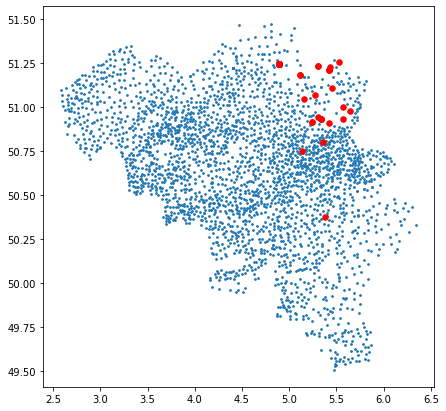

In [17]:
# plot all belgian cities + employee locations on same map
plt.figure(figsize=(7,7))
plt.scatter(postcodes_df["LONG"], postcodes_df["LAT"], s=3)
plt.scatter(employees_postcodes_df["LONG"],employees_postcodes_df["LAT"], s=30, color="red")
#plt.savefig("./Graphs/fig_locationemployeesonmap.jpeg")
plt.show

Most of the employees live in the Kempen region. We assume that the headquarters of the company is located in that region.

## 3.4 Which employees should be rewarded?



### 3.4.1 the employees that generate the most revenue (>10000)



In [18]:
hvc_am0_hvvisitresult = pd.merge(hvc_am0 , hvc_hvvisitresult)

agg_dict = {"AMOUNT": np.sum}
hvc_employee = hvc_am0_hvvisitresult.groupby("NAME").agg(agg_dict)
hvc_employee_sorted=hvc_employee.sort_values(by = "AMOUNT",ascending=False)

hvc_employee_sorted_rewarded = hvc_employee_sorted[hvc_employee_sorted["AMOUNT"]>10000.0]
hvc_employee_sorted_rewarded



,AMOUNT
NAME,
VAN HECKE jan,286009.10
PEETERS michel,265728.55
BUFFEL Sandy,186259.10
VERRESEN Dirk,94536.60
VERSTRAETE Erik,54292.00
MATTIJS stijn,47835.50
DE PAUW Kim,46556.10
KERCKAERT Pieter,20819.00
CLAUS David,16934.75


Text(0.5, 1.0, 'Best employees by turnover (>10000)')

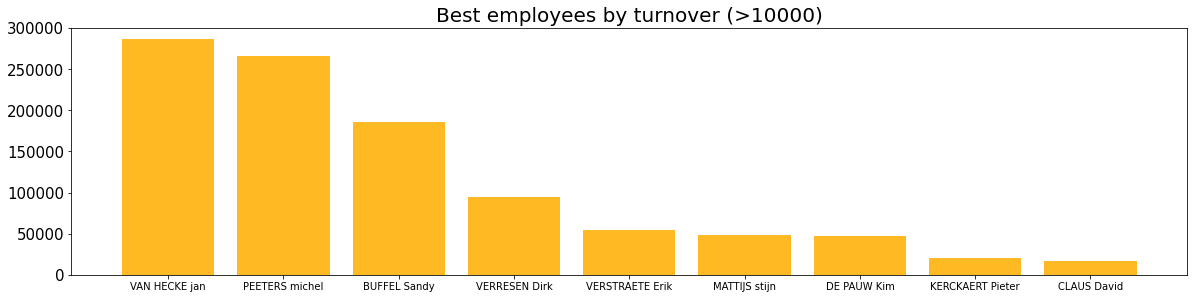

In [19]:

# create subplot
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
# plot barplot
plt.bar(x=range(9), height=hvc_employee_sorted_rewarded["AMOUNT"], label = "Amount", color = '#ffb923')
plt.set_color = ("#ffb923")
# set xticks
employee_names = []
for index in hvc_employee_sorted_rewarded.index:
    employee_names.append(index)
plt.xticks(range(9), employee_names, fontsize = 10)
plt.yticks(fontsize = 15)
# define title
#plt.savefig("./Graphs/fig_bestemployeesbyturnover.jpeg")
plt.title("Best employees by turnover (>10000)", fontsize = 20)

### 3.4.2 employees with excellent and good reviews

In [20]:
hvc_hvvisitresult_customer_reviews = pd.merge(hvc_hvvisitresult, hvc_customer_reviews)

In [21]:
# check value_counts of review
hvc_hvvisitresult_customer_reviews_counts = hvc_hvvisitresult_customer_reviews.value_counts("REVIEW")
hvc_hvvisitresult_customer_reviews_counts

REVIEW
Good service, satisfied               99107
No opinion                            84570
Not completely satisfied              16793
Excellent service, very satisfied     16736
Very bad service, very unsatisfied     1954
dtype: int64

In [22]:
#merge employees and visits
hvc_am0_hvc_hvvisitresult_customer_reviews = pd.merge(hvc_am0 , hvc_hvvisitresult_customer_reviews)
hvc_am0_hvc_hvvisitresult_customer_reviews_new1 = hvc_am0_hvc_hvvisitresult_customer_reviews.drop(hvc_am0_hvc_hvvisitresult_customer_reviews[hvc_am0_hvc_hvvisitresult_customer_reviews.REVIEW == "No opinion"].index)
#Convert all values to numbers on a scale of 4 to be able to analyse
hvc_am0_hvc_hvvisitresult_customer_reviews_new = hvc_am0_hvc_hvvisitresult_customer_reviews_new1.replace({"No opinion":2.5,"Very bad service, very unsatisfied":1,"Not completely satisfied":2,"Good service, satisfied":3,"Excellent service, very satisfied":4})
hvc_am0_hvc_hvvisitresult_customer_reviews_new

,AM0_NRID,EMPLOYEENUMBER,NAME,POSTCODE,LOCATION,LANGUAGE,HVVISITRESULT_NRID,SO0_NRID,HVOUTCOME_NRID,VISITDATE,DATEONLY,AMOUNT,PAYMENTTERM,REVIEW
0,18503648417252,507.0,QUINTEN Patrick,3690,Zutendaal,nl-BE,55369795,1525880,2,2021-10-24 16:38:59,2019-04-24,19.1,cash,3
1,18503648417252,507.0,QUINTEN Patrick,3690,Zutendaal,nl-BE,54876324,1525880,2,2021-10-24 17:41:32,2019-04-10,12.4,cash,3
2,18503648417252,507.0,QUINTEN Patrick,3690,Zutendaal,nl-BE,54453285,1525880,2,2021-10-24 18:32:15,2019-03-27,7.5,cash,3
3,18503648417252,507.0,QUINTEN Patrick,3690,Zutendaal,nl-BE,54003424,1525880,1,2021-10-24 18:15:13,2019-03-13,0.0,NaN,3
4,18503648417252,507.0,QUINTEN Patrick,3690,Zutendaal,nl-BE,52360367,1525880,2,2021-10-24 19:04:42,2019-01-16,8.9,cash,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219133,25532744515046,3422.0,PAUWELS Jeffrey,2460,Tielen,nl-BE,66478480,22075764385440,1,2021-10-24 14:47:36,2020-04-27,0.0,NaN,4
219135,25532744515046,3422.0,PAUWELS Jeffrey,2460,Tielen,nl-BE,71553005,725583,0,2021-10-24 16:37:59,2020-10-05,0.0,NaN,4
219136,25532744515046,3422.0,PAUWELS Jeffrey,2460,Tielen,nl-BE,67984128,25374964312840,2,2021-10-24 12:07:53,2020-06-10,283.0,cash,4
219137,25532744515046,3422.0,PAUWELS Jeffrey,2460,Tielen,nl-BE,71542817,25111268338048,1,2021-10-24 14:26:02,2020-10-05,0.0,NaN,3


In [23]:
#Create a matrix with all reviews per employee in separate arrays
employee_names = hvc_am0_hvc_hvvisitresult_customer_reviews_new["NAME"].unique()
matrix = []
for i in employee_names:
    tussenmatrix = []
    for e in range(len(hvc_am0_hvc_hvvisitresult_customer_reviews_new["NAME"])):
        if i == hvc_am0_hvc_hvvisitresult_customer_reviews_new.iloc[e,2]:
            tussenmatrix.append(hvc_am0_hvc_hvvisitresult_customer_reviews_new.iloc[e,13])
    matrix.append(tussenmatrix)

KeyboardInterrupt: 

In [ ]:
## Convert matrix to dataframe
dfreview = pd.DataFrame(matrix).T
dfreview.columns = employee_names
dfreview

##### Visualisation of the former dataframe

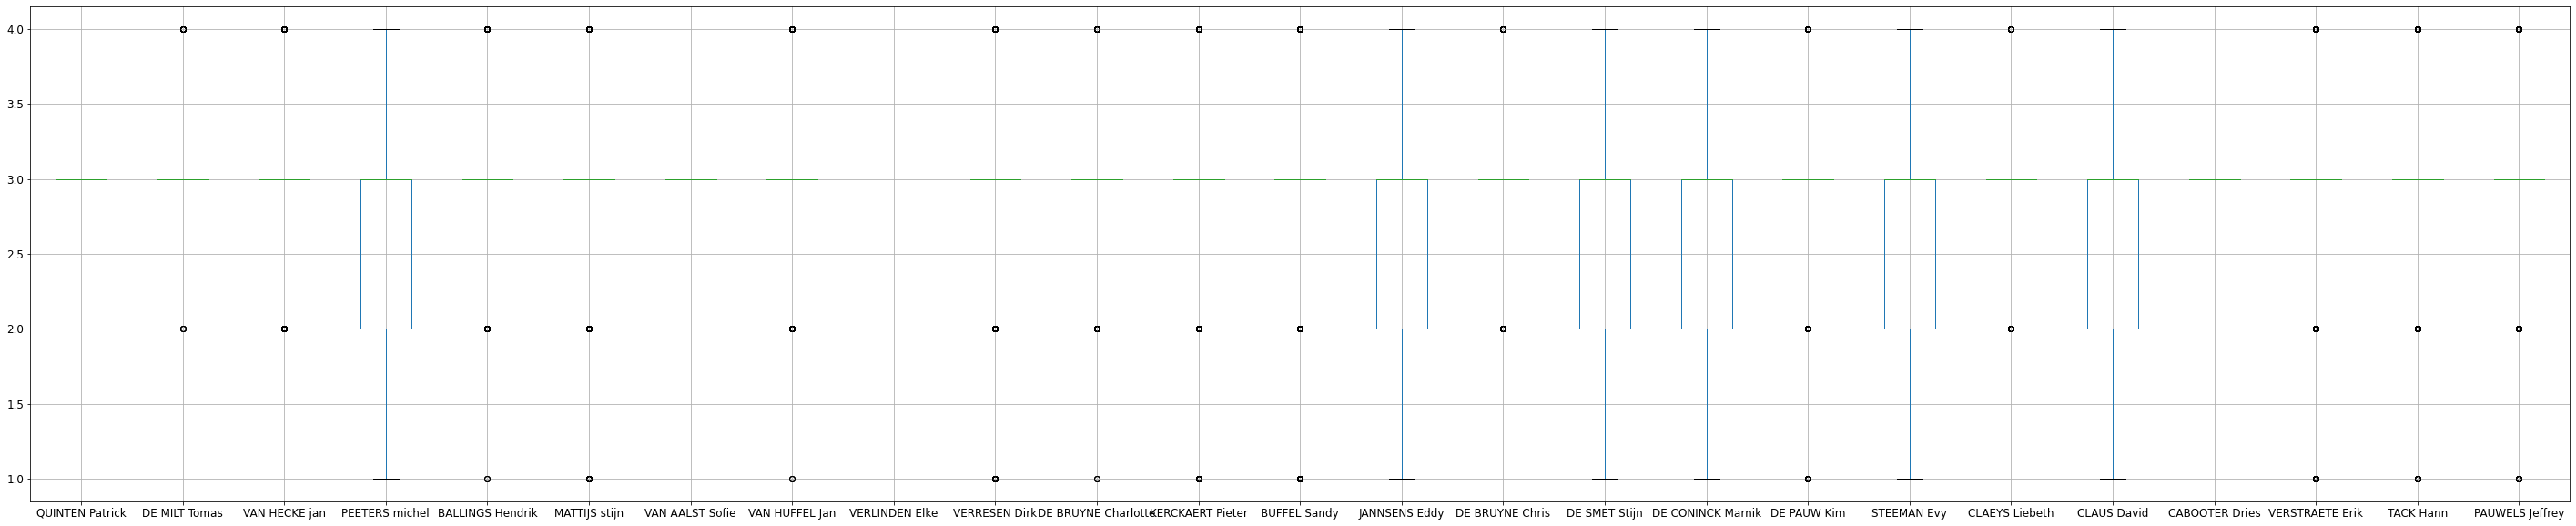

In [627]:
#boxplot
boxplot = dfreview.boxplot(column=None, by=None, ax=None, fontsize="large", rot=None, grid=True, figsize=(50,10), layout=None, return_type=None)

In [25]:
##BARPLOT
review_stats = hvc_am0_hvc_hvvisitresult_customer_reviews_new.groupby("NAME")["REVIEW"].agg(["mean", "sum"])
review_stats1 = review_stats.sort_values(by=["mean"],ascending=False )
review_stats1
#leave out the employees with low reviews
review_stats_new = review_stats1.drop(review_stats1[review_stats1["sum"] < 100].index)
#delete 0 to 1 of mean
review_stats_new["mean"] = review_stats_new["mean"]-1
review_stats_new

,mean,sum
NAME,,
DE MILT Tomas,2.137931,182
VERSTRAETE Erik,2.133339,36118
VAN HUFFEL Jan,2.125430,1819
DE PAUW Kim,2.116852,30888
VERRESEN Dirk,2.103915,42176
BALLINGS Hendrik,2.089087,2774
VAN HECKE jan,2.074985,100346
TACK Hann,2.057769,3070
BUFFEL Sandy,2.052040,74952


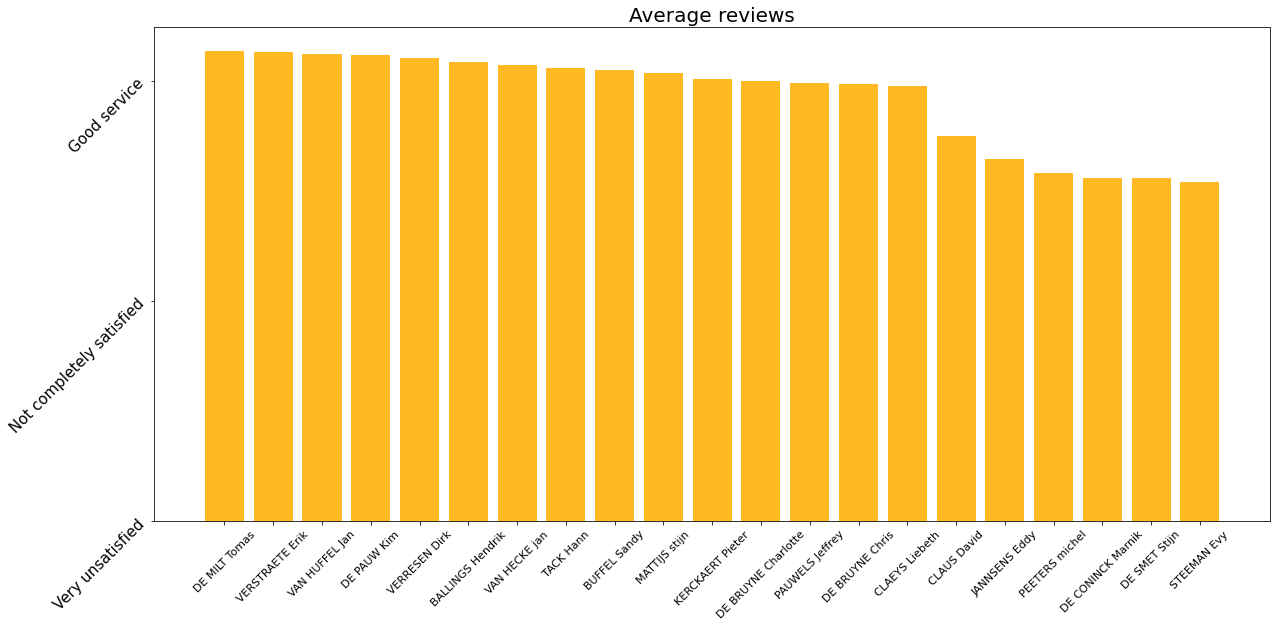

In [26]:

# create subplot
plt.figure(figsize = (20,20))
plt.subplot(2,1,1)
# plot barplot
plt.bar(x=range(21), height=review_stats_new["mean"], label = "Amount", color = '#ffb923')
plt.set_color = ("#ffb923")
# set xticks
employee_names = []
for index in review_stats_new.index:
    employee_names.append(index)
plt.xticks(range(21), employee_names, fontsize = 11, rotation = 45 )
reviews = ["Very unsatisfied", "Not completely satisfied", "Good service", ]
plt.yticks(range(3), reviews, fontsize = 15, rotation = 45)
# define title
plt.title("Average reviews", fontsize = 20)
#plt.savefig("./Graphs/fig_analysesreviewsemployees.jpeg")
plt.show()



### 3.4.2 How many % excellent and good reviews for best employees their turnover

Text(0.5, 1.0, 'Best employees by turnover (only reviews with opinion)')

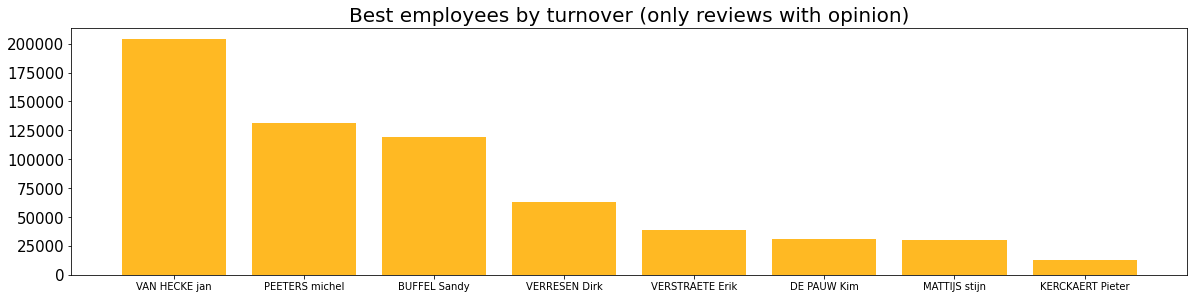

In [27]:
## first we make the plot without no opinion because we can't use these
hvc_am0_hvc_hvvisitresult_customer_reviews_new1
agg_dict = {"AMOUNT": np.sum}
hvc_employee = hvc_am0_hvc_hvvisitresult_customer_reviews_new1.groupby("NAME").agg(agg_dict)
hvc_employee_sorted=hvc_employee.sort_values(by = "AMOUNT",ascending=False)
## choose best 10 
hvc_employee_sorted_rewarded_without_no_opinion = hvc_employee_sorted[hvc_employee_sorted["AMOUNT"]>10000.0]
hvc_employee_sorted_rewarded_without_no_opinion
## now we make the new plot
# create subplot
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
# plot barplot
plt.bar(x=range(8), height=hvc_employee_sorted_rewarded_without_no_opinion["AMOUNT"], label = "Amount", color = '#ffb923')
plt.set_color = ("#ffb923")
# set xticks
employee_names = []
for index in hvc_employee_sorted_rewarded_without_no_opinion.index:
    employee_names.append(index)
plt.xticks(range(8), employee_names, fontsize = 10)
plt.yticks(fontsize = 15)
# define title
plt.title("Best employees by turnover (only reviews with opinion)", fontsize = 20)
#plt.savefig("./Graphs/best_employees_by_turnover_without_no_opinion.jpeg")



Text(0.5, 1.0, 'Best employees by turnover (only good and excellent)')

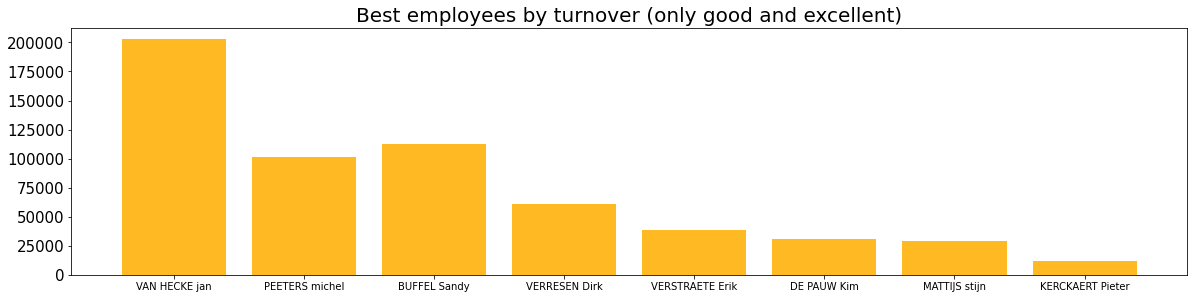

In [28]:
## now we make the plot without no opinion and bad scores 
hvc_am0_hvc_hvvisitresult_customer_reviews_last1 = hvc_am0_hvc_hvvisitresult_customer_reviews_new1.drop(hvc_am0_hvc_hvvisitresult_customer_reviews[hvc_am0_hvc_hvvisitresult_customer_reviews.REVIEW == "Very bad service, very unsatisfied"].index)
hvc_am0_hvc_hvvisitresult_customer_reviews_last2 = hvc_am0_hvc_hvvisitresult_customer_reviews_last1.drop(hvc_am0_hvc_hvvisitresult_customer_reviews_last1[hvc_am0_hvc_hvvisitresult_customer_reviews_last1.REVIEW == "Not completely satisfied"].index)

agg_dict = {"AMOUNT": np.sum}
hvc_employee_last = hvc_am0_hvc_hvvisitresult_customer_reviews_last2.groupby("NAME").agg(agg_dict)
hvc_employee_sorted_last=hvc_employee_last.sort_values(by = "AMOUNT",ascending=False)
hvc_employee_sorted_last = hvc_employee_sorted_last.reindex(hvc_employee_sorted_rewarded_without_no_opinion.index)


## choose best  
hvc_employee_sorted_rewarded_without_no_opinion2 = hvc_employee_sorted_last[hvc_employee_sorted_last["AMOUNT"]>10000.0]
hvc_employee_sorted_rewarded_without_no_opinion2
## now we make the new plot
# create subplot
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
# plot barplot
plt.bar(x=range(8), height=hvc_employee_sorted_rewarded_without_no_opinion2["AMOUNT"], label = "Amount", color = '#ffb923')
plt.set_color = ("#ffb923")
# set xticks
employee_names = []
for index in hvc_employee_sorted_rewarded_without_no_opinion2.index:
    employee_names.append(index)
plt.xticks(range(8), employee_names, fontsize = 10)
plt.yticks(fontsize = 15)
# define title
plt.title("Best employees by turnover (only good and excellent)", fontsize = 20)
#plt.savefig("./Graphs/best_employees_by_turnover_with_only_good&excellent.jpeg")

Text(0.5, 1.0, 'Difference turnover between all reviews and good/excellent reviews')

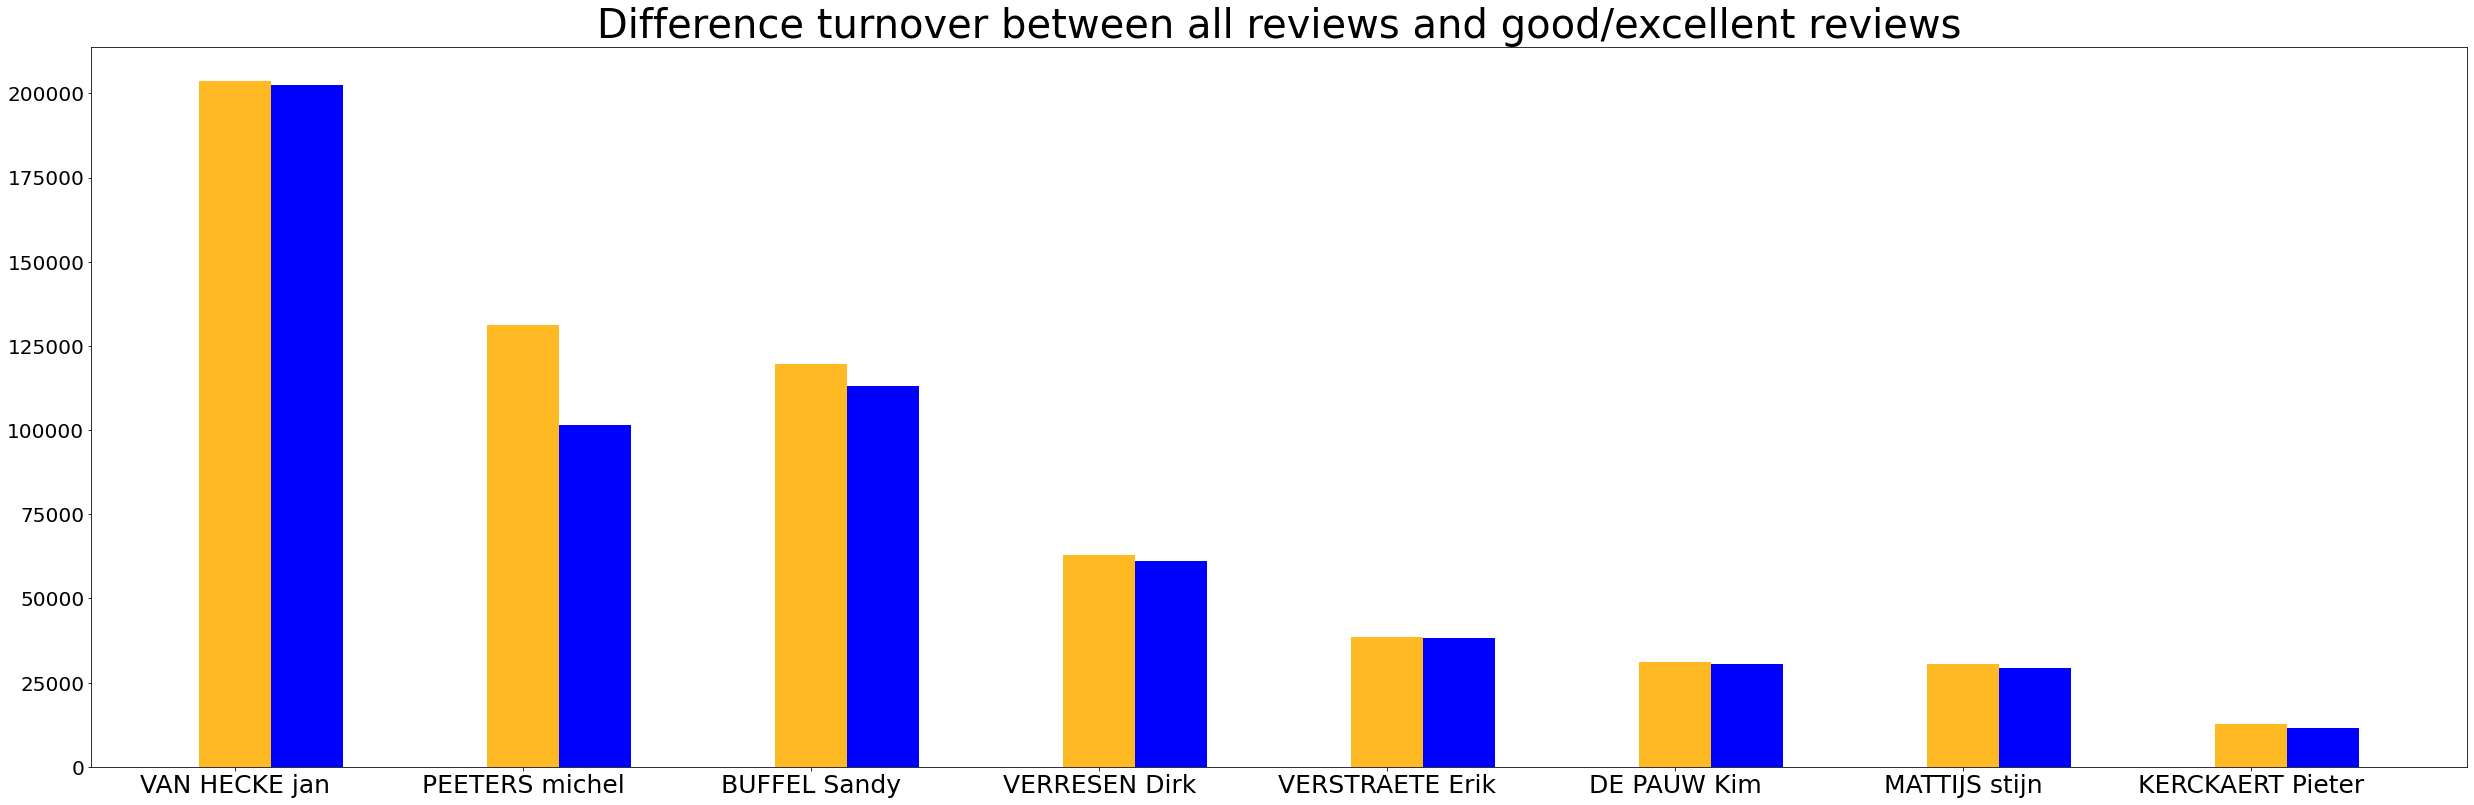

In [30]:
##merge last 2 graphs to be able to compare
##used data= hvc_employee_sorted_rewarded_without_no_opinion en hvc_employee_sorted_rewarded_without_no_opinion2
X = np.arange(8)
fig = plt.figure(figsize = (33,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, hvc_employee_sorted_rewarded_without_no_opinion["AMOUNT"], color = '#ffb923', width = 0.25)
ax.bar(X + 0.25, hvc_employee_sorted_rewarded_without_no_opinion2["AMOUNT"], color = 'b', width = 0.25)
plt.xticks(range(8), employee_names, fontsize = 25)
plt.yticks(fontsize = 20)

# define title
plt.title("Difference turnover between all reviews and good/excellent reviews", fontsize = 40)
#plt.savefig("./Graphs/best_employees_by_turnover_with_only_good&excellent.jpeg")

## 3.5 Which employees should be assigned to different routes?

(already in 4. Routes & Visits)